<a href="https://colab.research.google.com/github/eliaswalyba/2021-deep-learning-gift-course/blob/main/01_Perceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2021 New Year Gift Course - Deep Learning
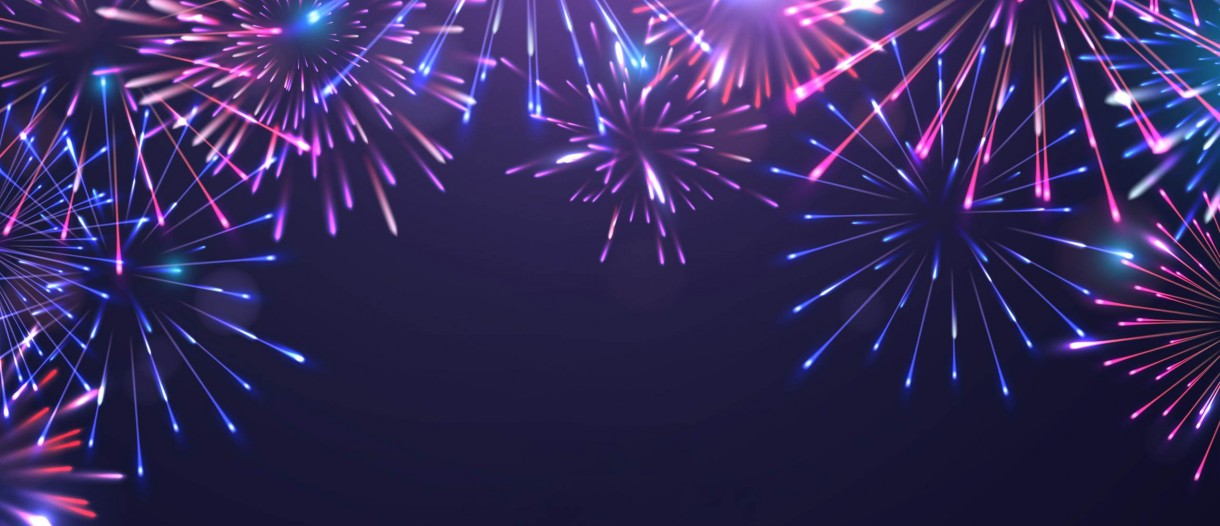
by [@eliaswalyba](https://twitter.com/eliaswalyba) | eliaswalyba@gmail.com

## Perceptrons
In this chapter we are introducing perceptrons (single layered perceptrons and multi layered perceptrons) which are the most basical neural network architecture. But the most important to know, cause it's the the basis of all the other neural network architectures.

### Perceptron representation
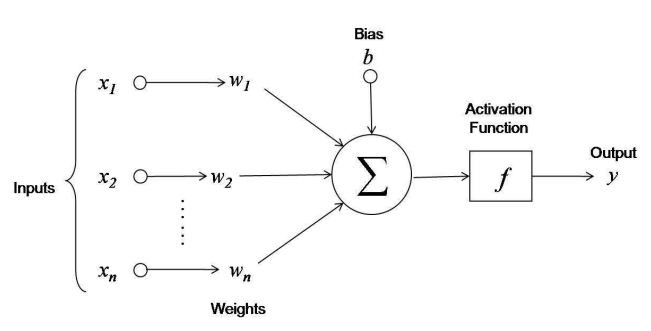

* **x1**, **x2**, ..., **xn** are the features of the data we feed in the perceptron
* **w1**, **w2**, ..., **wn** are the coefficients associated to those features. Actually all the learning part of machine learning / deep learning is about finding the right coefficients for good predictions (training)
* **b** is the bias, for now you can just consider as another coefficient like **wn** that helps the model to learn. For educational purpose I can choose to set it to zero.
* **epsilon** is a function that sums the products between the xs and the ws. **E = x1\*w1 + x2\*w2 + ... + xn\*wn + b**
* The activation function **f** is something we'll come back on more deeply later in this course. But for now, you can just see it as a tool that helps the model better fit the data by adding non-linearity. One of the properties of the activation function is it's always non-linear.
* The output **y** is the result of all the calculations. **y = f(E)**

### Activation Functions
In Neural networks, usually there is one more step: the activation function, often called **g**.

Indeed, without the activation function, the value of epsilon **E** have no boundaries: It could go up to ± infinity. 

Moreover, though less intuitive, activation functions add non-linearity to the algorithm: without activation function, only linearly separable problems can be solved ! I hope you remember what a linearly separable problem is ? We talked about it alot during the first class.



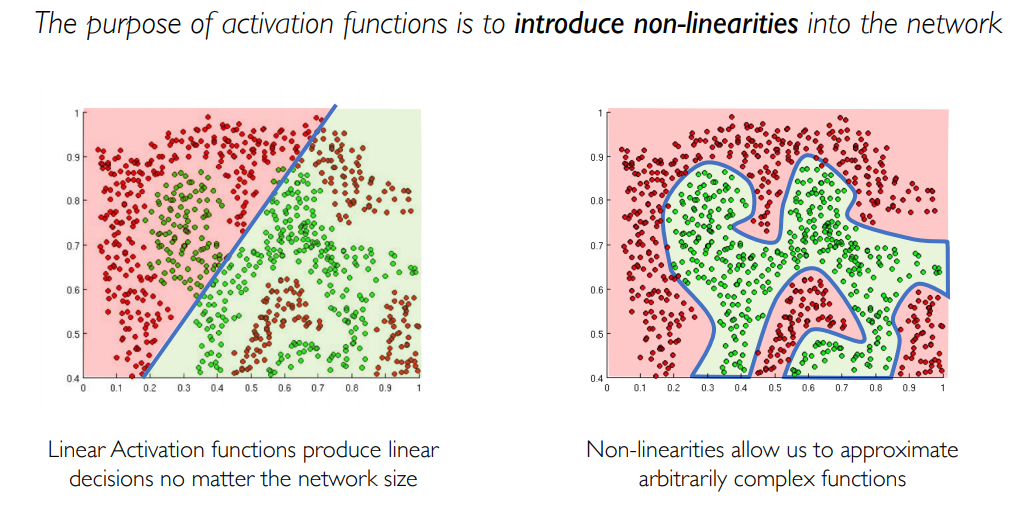



Let's see some very common activation functions.

* **Sigmoid** is a historic activation function, but not the most efficient in general, now used mainly in last layer of a binary classification. The formula is the following:

$$ sigmoid(x) = \frac{1}{1+e^{-x}} $$

* **Hyperbolic tangent (or tanh)** is quite similar to sigmoid function. The shape is close to the one of sigmoid, but ranges between -1 and 1, while sigmoid ranges between 0 and 1. This is has a symmetry that sigmoid does not.
This is not the most frequently used activation function at first approach anymore. The formula of tanh is the following:

$$
tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
$$

* **Rectified linear unit (or relu)** is really different than sigmoid and tanh activations. Even though it looks odd at first sight, it has the advantage of avoiding the problem of vanishing gradient. It is currently one of the most widely used activation function. The formula is the following:

$$
relu(x) = max(0, x)
$$

Let's see what those functions look like !

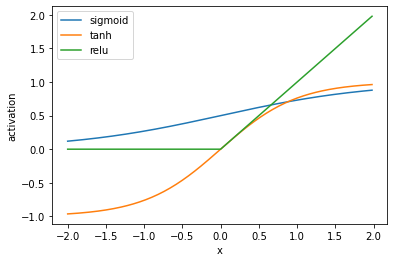

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-2, 2, 0.02)

sigmoid = 1./(1+np.exp(-x))
tanh = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
relu = np.max([np.zeros(len(x)), x], axis=0)

plt.plot(x, sigmoid)
plt.plot(x, tanh)
plt.plot(x, relu)

plt.xlabel('x')
plt.ylabel('activation')
plt.legend(['sigmoid', 'tanh', 'relu'])

plt.show()

Houraaa ! well if you still understand then we're on the right path. This is basicaly the most difficult thing to grab about neural networks topology. Actually the Perceptron is nothing but a simple unit of a neural network. That means a neural is just a stack of layers of perceptrons and this why they are called **Multi Layered Perceptron - MLP** we'll talk about MLP just in a minute. 

But before that let's see how to build a simple Perceptron with sigmoid activation in TensorFlow 2. Le'go !

In [ ]:
# Import tensorflow
import tensorflow as tf

# Define a function
def perceptron(input_dim):
    # We create a so called Sequential model
    model = tf.keras.models.Sequential()
    
    # Add the first "Dense" layer of 3 units, and give the input dimension (here 5)
    model.add(tf.keras.layers.Dense(1, input_dim=input_dim, activation='sigmoid'))

    # return the created model
    return model  

You will soon get familiar with the classes of TensorFlow/Keras. Here we are using the following:
- `Sequential()`: this will contain all the layers of our neural network
- `Dense(units, activation=None)`: this is a classical multi layer perceptron, taking as input the number of units (i.e. Neurons) and the activation function

> **NB:** the first layer of a `Sequential` model always takes as input the `input_dim`: this is the `shape` of your features! Otherwise TensorFlow does not know how many input features you have!

Finally, one can review a model with the `summary()` method:

In [ ]:
my_perceptron = perceptron(input_dim=5)

my_perceptron.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


Heeey ! congrats, you just built your very first Perceptron using Python and TensorFlow 2 / Keras. This wonderful, but ... sad news is actually our Perceptron is not fully working yet. What we have built so far, is just the architecture of the model, but we didn't add some very important components that allows the model to be trained and tested. But this is not a problem you should worry about yet, we'll come there. For now let's enjoy our victory !

### Multi Layered Perceptrons
Neural networks are usually represented on diagrams using a standard convention:
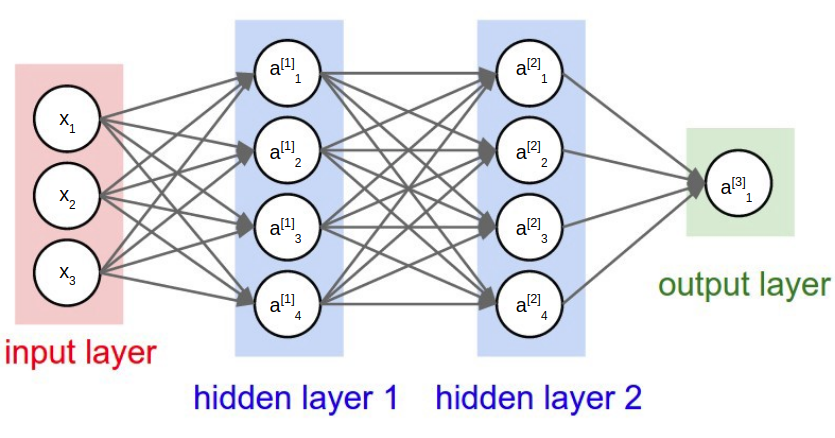



This diagram has to be read from left to right.

On the left, here in red, is the **input layer**: this is actually the input features $X=(x_1, x_2, x_3)$ (e.g. number of rooms in a house, presence of a garden...). The number of **units** is the number of input features.

On the right, in green, is the **output layer**: this is the prediction of target value (e.g. the house price in a regression, or the class in classification). The number of **units** depends on the task (for regression it is usually one, for multiclass classification the number of classes).

There is always one and only one input layer and output layer.

In the middle, in blue, are the **hidden layers**. There can be an arbitrary number of hidden layers. The hiddens layers also have an arbitrary number of **units**.

Let's change a little bit the code of our perceptron to turn into a multi layered perceptron (MLP)

In [ ]:
# Import tensorflow
import tensorflow as tf

# Define a function
def mlp(input_dim):
    # We create a so called Sequential model
    model = tf.keras.models.Sequential()
    
    # Add the first "Dense" layer of 3 units, and give the input dimension (here 5)
    model.add(tf.keras.layers.Dense(3, input_dim=input_dim, activation='sigmoid'))
    
    # Add the first "Dense" layer of 3 units, and give the input dimension (here 5)
    model.add(tf.keras.layers.Dense(4, activation='sigmoid'))

    # Add the first "Dense" layer of 3 units, and give the input dimension (here 5)
    model.add(tf.keras.layers.Dense(4, activation='sigmoid'))

    # Add the first "Dense" layer of 3 units, and give the input dimension (here 5)
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # return the created model
    return model 

In [ ]:
my_mlp = mlp(input_dim=5)

my_mlp.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 16        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________


### The Feed Forward Algorithm (FFA)
Now that we understand the representation of a perceptron and a multi layered perceptron, we would understand how to compute the output predicted value, given input features $X = (x_1, x_2, ..., x_N)$.

To compute this output predicted value, we need to weights $W$ of each unit.

Each unit $i$ of a layer $l$ (except the input layer) has associated weights $W^{[l]}_i$. We will use those weights compute the activation $a^{[l]}_i$ of each unit.

Considering our example in diagram, we could compute the activations of the first hidden layer using the following formulas:

$$
a^{[1]}_{1} = g(W^{[1]}_{1} \times X + b^{[1]}_{1})
$$

$$
a^{[1]}_{2} = g(W^{[1]}_{2} \times X + b^{[1]}_{2})
$$

$$
a^{[1]}_{3} = g(W^{[1]}_{3} \times X + b^{[1]}_{3})
$$

$$
a^{[1]}_{4} = g(W^{[1]}_{4} \times X + b^{[1]}_{4})
$$

Where $b^{[1]}_{i}$ is called the bias, i just an additional parameter, and g is the activation function

Now if we want to compute the activations of the second hidden layer $a^{[2]}_i$, we would use the exact same formulas, but with the activations of the first hidden layer as input ($a^{[1]}_i$), instead of the input features:

$$
a^{[2]}_{1} = g(W^{[2]}_{1} \times a^{[1]} + b^{[2]}_{1})
$$

$$
a^{[2]}_{2} = g(W^{[2]}_{2} \times a^{[1]} + b^{[2]}_{2})
$$

$$
a^{[2]}_{3} = g(W^{[2]}_{3} \times a^{[1]} + b^{[2]}_{3})
$$

$$
a^{[2]}_{4} = g(W^{[2]}_{4} \times a^{[1]} + b^{[2]}_{4})
$$

Finally, to compute the output layer would be exactly the same:
$$
a^{[3]}_{1} = g(W^{[3]}_{1} \times a^{[2]} + b^{[3]}_{1})
$$

So to summarize, the forward propagation is nothing complicated, this is just multiplications and additions.

### Output Errors And Error Functions
We cannot calculate the perfect weights for a neural network; there are too many unknowns. Instead, the problem of learning is cast as a search or optimization problem and an algorithm is used to navigate the space of possible sets of weights the model may use in order to make good or good enough predictions.

Typically, a neural network model is trained using the stochastic gradient descent optimization algorithm and weights are updated using the backpropagation of error algorithm.

The “gradient” in gradient descent refers to an error gradient. The model with a given set of weights is used to make predictions and the error for those predictions is calculated.

The gradient descent algorithm seeks to change the weights so that the next evaluation reduces the error, meaning the optimization algorithm is navigating down the gradient (or slope) of error.

Now that we know that training neural nets solves an optimization problem, we can look at how the error of a given set of weights is calculated.

#### What Is a Loss Function and Loss?
In the context of an optimization algorithm, the function used to evaluate a candidate solution (i.e. a set of weights) is referred to as the objective function.

We may seek to maximize or minimize the objective function, meaning that we are searching for a candidate solution that has the highest or lowest score respectively.

Typically, with neural networks, we seek to minimize the error. As such, the objective function is often referred to as a cost function or a loss function and the value calculated by the loss function is referred to as simply “loss.”

The cost or loss function has an important job in that it must faithfully distill all aspects of the model down into a single number in such a way that improvements in that number are a sign of a better model.

In calculating the error of the model during the optimization process, a loss function must be chosen.

This can be a challenging problem as the function must capture the properties of the problem and be motivated by concerns that are important to the project and stakeholders.

Now that we are familiar with the loss function and loss, we need to know what functions to use.

#### Maximum Likelihood
There are many functions that could be used to estimate the error of a set of weights in a neural network.

We prefer a function where the space of candidate solutions maps onto a smooth (but high-dimensional) landscape that the optimization algorithm can reasonably navigate via iterative updates to the model weights.

Maximum likelihood estimation, or MLE, is a framework for inference for finding the best statistical estimates of parameters from historical training data: exactly what we are trying to do with the neural network.

We have a training dataset with one or more input variables and we require a model to estimate model weight parameters that best map examples of the inputs to the output or target variable.

Given input, the model is trying to make predictions that match the data distribution of the target variable. Under maximum likelihood, a loss function estimates how closely the distribution of predictions made by a model matches the distribution of target variables in the training data.

A benefit of using maximum likelihood as a framework for estimating the model parameters (weights) for neural networks and in machine learning in general is that as the number of examples in the training dataset is increased, the estimate of the model parameters improves. This is called the property of “consistency.”

Now that we are familiar with the general approach of maximum likelihood, we can look at the error function.

#### Maximum Likelihood and Cross-Entropy
Under the framework maximum likelihood, the error between two probability distributions is measured using cross-entropy.

When modeling a classification problem where we are interested in mapping input variables to a class label, we can model the problem as predicting the probability of an example belonging to each class. In a binary classification problem, there would be two classes, so we may predict the probability of the example belonging to the first class. In the case of multiple-class classification, we can predict a probability for the example belonging to each of the classes.

In the training dataset, the probability of an example belonging to a given class would be 1 or 0, as each sample in the training dataset is a known example from the domain. We know the answer.

Therefore, under maximum likelihood estimation, we would seek a set of model weights that minimize the difference between the model’s predicted probability distribution given the dataset and the distribution of probabilities in the training dataset. This is called the cross-entropy.

Technically, cross-entropy comes from the field of information theory and has the unit of “bits.” It is used to estimate the difference between an estimated and predicted probability distributions.

In the case of regression problems where a quantity is predicted, it is common to use the mean squared error (MSE) loss function instead.

Nevertheless, under the framework of maximum likelihood estimation and assuming a Gaussian distribution for the target variable, mean squared error can be considered the cross-entropy between the distribution of the model predictions and the distribution of the target variable.

Therefore, when using the framework of maximum likelihood estimation, we will implement a cross-entropy loss function, which often in practice means a cross-entropy loss function for classification problems and a mean squared error loss function for regression problems.

Almost universally, deep learning neural networks are trained under the framework of maximum likelihood using cross-entropy as the loss function.

In fact, adopting this framework may be considered a milestone in deep learning, as before being fully formalized, it was sometimes common for neural networks for classification to use a mean squared error loss function.

The maximum likelihood approach was adopted almost universally not just because of the theoretical framework, but primarily because of the results it produces. Specifically, neural networks for classification that use a sigmoid or softmax activation function in the output layer learn faster and more robustly using a cross-entropy loss function.

#### What Loss Function to Use?
We can summarize the previous section and directly suggest the loss functions that you should use under a framework of maximum likelihood.

Importantly, the choice of loss function is directly related to the activation function used in the output layer of your neural network. These two design elements are connected.

Think of the configuration of the output layer as a choice about the framing of your prediction problem, and the choice of the loss function as the way to calculate the error for a given framing of your problem.

We will review best practice or default values for each problem type with regard to the output layer and loss function.

* Regression Problem
A problem where you predict a real-value quantity.
    * Output Layer Configuration: One node with a linear activation unit.
    * Loss Function: Mean Squared Error (MSE).

* Binary Classification Problem
A problem where you classify an example as belonging to one of two classes. The problem is framed as predicting the likelihood of an example belonging to class one, e.g. the class that you assign the integer value 1, whereas the other class is assigned the value 0.
    * Output Layer Configuration: One node with a sigmoid activation unit.
    * Loss Function: Cross-Entropy, also referred to as Logarithmic loss.

* Multi-Class Classification Problem
A problem where you classify an example as belonging to one of more than two classes. The problem is framed as predicting the likelihood of an example belonging to each class.

    * Output Layer Configuration: One node for each class using the softmax activation function.
    * Loss Function: Cross-Entropy, also referred to as Logarithmic loss.

### Backpropagation and Gradient Descent Algorithms
Backpropagation and Gradient Descent are one of the tools used to train neural networks. The trainning process allows to let the neural network adjust it's weights **Ws** based on the errors made after each iteration. Gradient Descent allows to measure the rate of the error made and backpropagation allows to propagate that error thru the network but from the end to the beginning, that's why it is called backpropagation.

#### Gradient Descent
This method is the key to minimizing the loss function and achieving our target, which is to predict close to the original value.

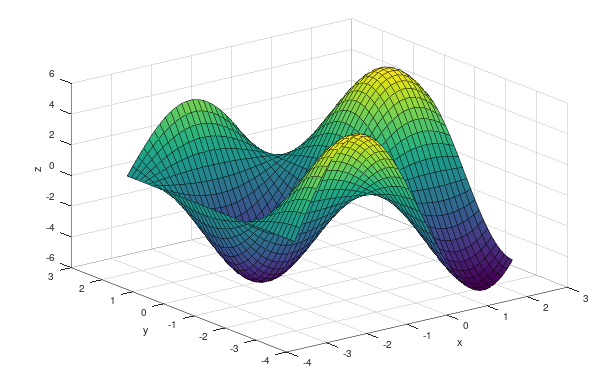

In this diagram, above we see our loss function graph. If we observe we will see it is basically a parabolic shape or a convex shape, it has a specific global minimum which we need to find in order to find the minimum loss function value.

So, we always try to use a loss function which is convex in shape in order to get a proper minimum.

Now, we see the predicted results depend on the weights from the feed forward formula. 

Initially, the model assigns random weights to the features. So, say it initializes the weight=a. 

So, we can see it generates a loss which is far from the minimum point L-min.

Now, we can see that if we move the weights more towards the positive x-axis we can optimize the loss function and achieve minimum value. 

But, how will the machine know? We need to optimize weight to minimize error, so, obviously, we need to check how the error varies with the weights.

To do this we need to find the derivative of the Error with respect to the weight. **This derivative is called Gradient.**

$$Gradient = dE/dw$$

Where $E$ is the error and $w$ is the weight.
Let’s see how this works.

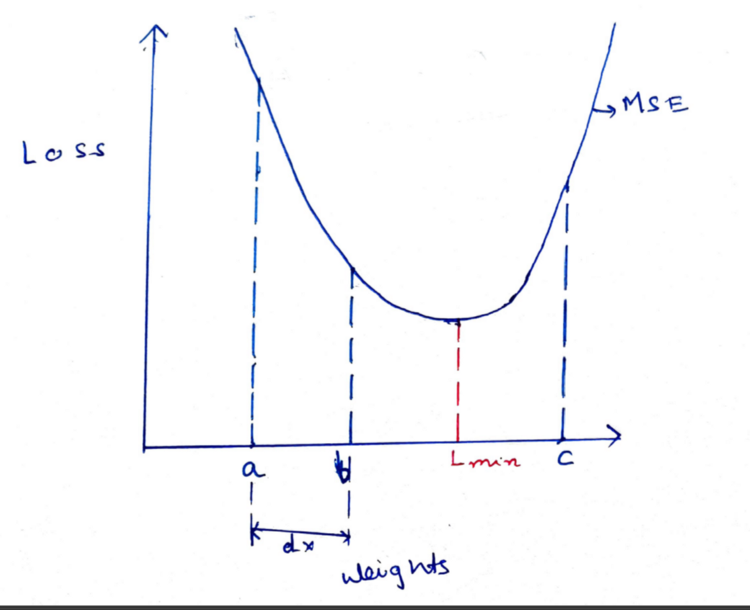

Say, if the loss increases with an increase in weight so Gradient will be positive, So we are basically at the point C, where we can see this statement is true.

If loss decreases with an increase in weight so gradient will be negative. We can see point A, corresponds to such a situation. 

Now, from point $A$ we need to move towards positive x-axis and the gradient is negative.

From point $C$, we need to move towards negative $x-axis$ but the gradient is positive.

So, always the negative of the Gradient shows the directions along which the weights should be moved in order to optimize the loss function. So, this way the gradient guides the model whether to increase or decrease weights in order to optimize the loss function.

The model found which way to move, now the model needs to find by how much it should move the weights. This is decided by a parameter called Learning Rate denoted by $Alpha$.

In the diagram we see, the weights are moved from point $A$ to point $B$ which are at a distance of $dx$.

$$dx=alpha*|dE/dw|$$

So, the distance to move is the product of learning rate parameter $alpha$ and the magnitude of change in error with a change in weight at that point.

Now, we need to decide the Learning Rate very carefully. If it is very large the values of weights will be changed with a great amount and it would overstep the optimal value. If it is very low it takes tiny steps and takes a lot of steps to optimize. The updated weights are changed according to the following formula.

$$w=w-alpha*|dE/dw|$$

where $w$ is the previous weight.

With each epoch, the model moves the weights according to the gradient to find the best weights.

Now, this is a loss optimization for a particular example in our training dataset. Our dataset contains thousands of such examples, so it will take a huge time to find optimal weights for all.

Experiments have shown that if we optimize on only one sample of our training set, the weight optimization is good enough for the whole dataset.

So, depending upon the methods we have different types of gradient descent mechanisms.

* Stochastic Gradient Descent: When we train the model to optimize the loss function using only one particular example from our dataset, it is called Stochastic Gradient Descent.

* Batch Gradient Descent: When we train the model to optimize the loss function using the mean of all the individual losses in our whole dataset, it is called Batch Gradient Descent.

* Mini-Batch Gradient Descent: Now, as we discussed batch gradient descent takes a lot of time and is therefore somewhat inefficient. If we look at SGD, it is trained using only 1 example. So, how good do you think a baby will learn if it is shown only one bike and told to learn about all other bikes? It's simple its decision will be somewhat biased to the peculiarities of the shown example. So, it is the same for the SGD, there is a possibility that the model may get too biased with the peculiarity of that particular example. So, we use the mean of a batch of 10–1000 examples to check the optimize the loss in order to deal with the problems.

#### Backpropagation
The minimum of the loss function of the neural network is not very easy to locate because it is not an easy function like the one we saw for MSE.

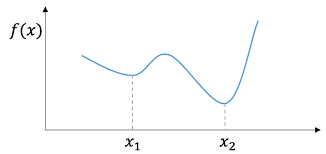


Now, as we see in the graph the loss function may look something like this. As we can see it has two minima, a local one and a global one. So, if we somehow end up in the local one we will end up in a suboptimal state. So, here the point where the weights initialize matters. For example, if the weights initialize to somewhere near $x1$ and there is a high chance we will get stuck at the local minima, which is not the same with normal MSE.

So, in neural nets the result Y-output is dependent on all the weights of all the edges. So, the error is obtained at the last output node and then we need to change w-12 and w-13 accordingly. So, we need to backpropagate the error all the way to the input node from the output node.

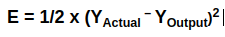

$W_{ij}$ is the weight of the edge from the output of the ith node to the input of the jth node. Now, here the $x$ is the input to every node. $y$ is the output from every node. Except for the input node, for all nodes,

$Y=F(X)$

Where F is the activation function.

For Input node

Now, we can see, the hidden layer nodes have a function $F1$ but in the output layer, it is $F2$. The $F1$ is usually $ReLU$ and $F2$ is usually a $Sigmoid$.

So for optimization of weights, we need to know the $dE /dW_{ij}$ for every W_{ij} in the network.

For this, we also need to, find the $dE/dX_i$ and $dE/dY_i$ for every node in the network.


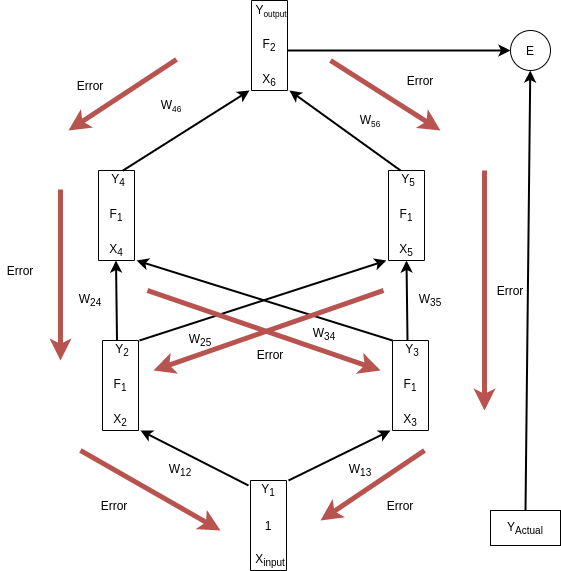

The error generated is backpropagated from the through the same nodes and the same edges through which forward propagation takes place and reaches from input edges from the output node.

#### Optimizers
Now we have seen the loss function has various local minima which can misguide our model. We can prevent this from happening if we can monitor and fix the learning rate properly.

Now, manually doing this is not possible, optimizers does this for us. It optimizes the learning rate automatically to prevent the model from entering a local minimum and is also responsible for fastening the optimization process.

Most used optimizers are:

* Adam
* Adagrad
* RMSProp
* SGD.

Adam is the most commonly used optimizer.

### Model Building
Now that we have learned all of this great things, let's practice and build our very first end-to-end model.

#### Classification Problem
We are going to use Python and TensorFlow along with Breast Cancer Dataset from the Scikit Learn librairy to build a MLP model that is able to predict a breast has cancer or not.

This is binary classification problem. You remember ? We talked about it previously.

##### Model architecture creation

In [ ]:
# Import tensorflow
import tensorflow as tf

# Define a function
def model(input_dim):
    # We create a so called Sequential model
    model = tf.keras.models.Sequential()
    
    # Add the first "Dense" layer of 3 units, and give the input dimension (here 5)
    model.add(tf.keras.layers.Dense(3, input_dim=input_dim, activation='sigmoid'))
    
    # Add the second "Dense" layer of 3 units
    # This time the input dimension is not needed anymore: it is known from the previous layer
    model.add(tf.keras.layers.Dense(3, activation='sigmoid'))

    # Add finally the output layer with one unit: the predicted result
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # return the created model
    return model  

In [ ]:
my_model = model(input_dim=5)
my_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 4         
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


##### Model architecture compilation
Then you have to compile your model: indeed TensorFlow does not fully work on Python, so a compilation step is necessary. In the compilation, you can provide several parameters.
* The optimizer is the optimization algorithm: you already know the gradient descent, you can call it by using `optimizer='SGD`
* The loss function: for binary classification use `loss='binary_crossentropy'`, for regression use `loss='mean_squared_error'`
* You can also play with the metrics to display in real time, for example to display the accuracy, add the parameter `metrics=['accuracy']`

For more information, the documentation is [here](https://keras.io). 

In [ ]:
# Then you want to compile your model
# here with Gradient Descent and binary cross entropy (for binary classification)
my_model = model(input_dim=30)
my_model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

##### Model architecture training
Finally, you want to fit your model: just like in scikit-learn! For this example, we will use the *Wisconsin Breast Cancer* dataset from scikit-learn and then fit our model.

Again, some parameters have to be given:
* `x`: the input features
* `y`: the labels or target values
* `epochs`: the number of times you iterate over all the input samples
* `batch_size`: the number of samples used before updating the parameters of the model (we will speak more about it tomorrow)

In [ ]:
# First import and load the data
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

# Scale the input features
X=(X - X.mean(axis=0))/X.std(axis=0)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model, iterating on the data in batches of 32 samples
my_model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
15/15 [==============================] - 1s 18ms/step - loss: 0.6471 - accuracy: 0.6543 - val_loss: 0.7090 - val_accuracy: 0.5877
Epoch 2/10
15/15 [==============================] - 0s 4ms/step - loss: 0.6605 - accuracy: 0.6382 - val_loss: 0.7055 - val_accuracy: 0.5877
Epoch 3/10
15/15 [==============================] - 0s 4ms/step - loss: 0.6867 - accuracy: 0.6100 - val_loss: 0.7025 - val_accuracy: 0.5877
Epoch 4/10
15/15 [==============================] - 0s 4ms/step - loss: 0.6376 - accuracy: 0.6596 - val_loss: 0.6992 - val_accuracy: 0.5877
Epoch 5/10
15/15 [==============================] - 0s 4ms/step - loss: 0.6636 - accuracy: 0.6269 - val_loss: 0.6963 - val_accuracy: 0.5877
Epoch 6/10
15/15 [==============================] - 0s 4ms/step - loss: 0.6588 - accuracy: 0.6308 - val_loss: 0.6944 - val_accuracy: 0.5877
Epoch 7/10
15/15 [==============================] - 0s 13ms/step - loss: 0.6325 - accuracy: 0.6627 - val_loss: 0.6916 - val_accuracy: 0.5877
Epoch 8/10
15/15 [

At the end, you can just predict values on a new sample using the usual *predict* method.

##### Model architecture evaluation
To predict, do not change your habits: use the function `.predict(X)`:

In [ ]:
# Predict for some values
my_model.predict(X_test[:5])

array([[0.66544664],
       [0.70081735],
       [0.708896  ],
       [0.695235  ],
       [0.7001741 ]], dtype=float32)

To evaluate, you can of course use scikit-learn's metrics as usual. But warning, the keras `.predict()` method does not return classes, but probabilities!

You can also use `.evaluate(X, y)`:
This function returns a list with the loss and the metrics.

In [ ]:
# Evaluate your model
loss, accuracy = my_model.evaluate(X_test, y_test)
print('loss is:', loss)
print('accuracy is:', accuracy)

4/4 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5877
loss is: 0.686355710029602
accuracy is: 0.5877193212509155


#### Regression Problem
We will apply our knowledge to a use case we already know well: house price prediction on boston dataset.

This is a regression problem.

##### Data preparation

In [ ]:
# Import and load the dataset
from sklearn.datasets import load_boston

data = load_boston().data
target = load_boston().target
features = load_boston().feature_names

In [ ]:
# Have a peek on the data
import pandas as pd

X_df = pd.DataFrame(data=data, columns=features)
X_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# Let's scale and split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_df = scaler.fit_transform(X_df)

X_train, X_test, y_train, y_test = train_test_split(X_df, target, test_size=0.2, random_state=0)

##### Model architecture creation
Now we want to build a Neural Network to perform this regression task. We will build a Neural Networks with 5 hidden layers of 100 units each.

In [ ]:
# Create the Sequential object
def model_five_layers(input_dim):

    model = tf.keras.models.Sequential()

    # Add the first Dense layers of 100 units with the input dimension
    model.add(tf.keras.layers.Dense(100, input_dim=input_dim, activation='sigmoid'))

    # Add four more layers of 100 units
    model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

    # Add finally the output layer with one unit: the predicted result
    model.add(tf.keras.layers.Dense(1, activation='linear'))
    
    return model

##### Model architecture compilation

In [ ]:
model = model_five_layers(input_dim=X_train.shape[1])

# Compile the model with mean squared error (for regression)
model.compile(optimizer='SGD', loss='mean_squared_error')

##### Model architecture training


In [ ]:
# Now fit the model on 500 epoches with a batch size of 64
# You can add the test/validation set into the fit: it will give insights on this dataset too
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=32)

Epoch 1/500
13/13 [==============================] - 0s 14ms/step - loss: 227.0513 - val_loss: 81.5519
Epoch 2/500
13/13 [==============================] - 0s 5ms/step - loss: 92.6555 - val_loss: 86.5508
Epoch 3/500
13/13 [==============================] - 0s 5ms/step - loss: 92.8825 - val_loss: 91.1182
Epoch 4/500
13/13 [==============================] - 0s 5ms/step - loss: 104.2130 - val_loss: 83.1920
Epoch 5/500
13/13 [==============================] - 0s 4ms/step - loss: 95.0559 - val_loss: 81.4120
Epoch 6/500
13/13 [==============================] - 0s 5ms/step - loss: 90.1657 - val_loss: 96.9880
Epoch 7/500
13/13 [==============================] - 0s 4ms/step - loss: 81.7088 - val_loss: 87.2048
Epoch 8/500
13/13 [==============================] - 0s 4ms/step - loss: 83.9363 - val_loss: 93.0600
Epoch 9/500
13/13 [==============================] - 0s 4ms/step - loss: 91.5833 - val_loss: 84.0712
Epoch 10/500
13/13 [==============================] - 0s 4ms/step - loss: 86.4092 - val_

### Model Regularization
Neural networks, as you know, are a really powerful tool. With a complex enough hierarchy, a neural network can learn almost anything. But the drawback is that they can overfit really easily.

Then, more than for any other model, regularization might be key to a good model.

Below is a plot of the loss of a neural network as a function of the number of epochs, trained on the MNIST digits dataset.

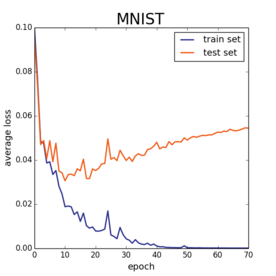

As one can see, on this example, after 10 epochs the model is actually overfitting and the test set loss does not decrease anymore. Even worse: the test loss increases!

> This means after 10 epochs the **performance** of the MLP is **decreasing**!

To overcome this situation, there are several ways: adding regularization, changing the number of layers/units, early stopping, dropout or even data augmentation.

#### Add Regularization

Regularization can be added at each layer just with a single parameter:

```
# Example of dense layer of 64 units with a regularization parameter set to 0.01
model.add(Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
```

However, sometimes you might not want to go directly onto this kind of regularization.

#### Layers and Units

Playing with layers and units is another way to add regularization. Indeed, overfitting is usually cause by a model too complex for the task. Thus, sometimes reducing the number of layers and units might decrease overfitting and then add regularization.

#### Early Stopping

As you can see in the already showed plot:

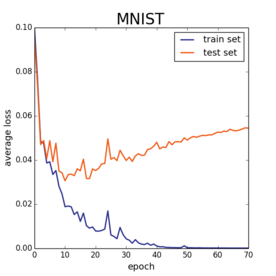

Overfitting usually does not happen during the first epochs. Then a method so called **early stopping** is to **stop training before the network overfits**.

Basically, in this example, a good early stopping would have been to stop around epoch 10.

However, TensorFlow allows to automatize that process, using the following callback method: 

```Python
tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
```

```
# Import the module
from keras.callbacks import EarlyStopping

# Instantiate a callback: here 5 epochs without improvement of the val_loss will stop training
callback = [EarlyStopping(monitor='val_loss', patience=5)]

# Then use it when you fit your model
model.fit(x = x,
          y = y,
          batch_size = BatchSize,
          epochs = epochs,
          validation_data=(x_text, y_test),
          callbacks = callback)
```

#### Dropout

A commonly used way of regularizing is the **dropout**. Dropout randomly sets some activation functions to 0 while fitting: this is equivalent to **randomly remove some units** of the neural network.

Why? Because it forces the network to not rely on some units only, but to use them all! Thus is may prevent from overfitting.

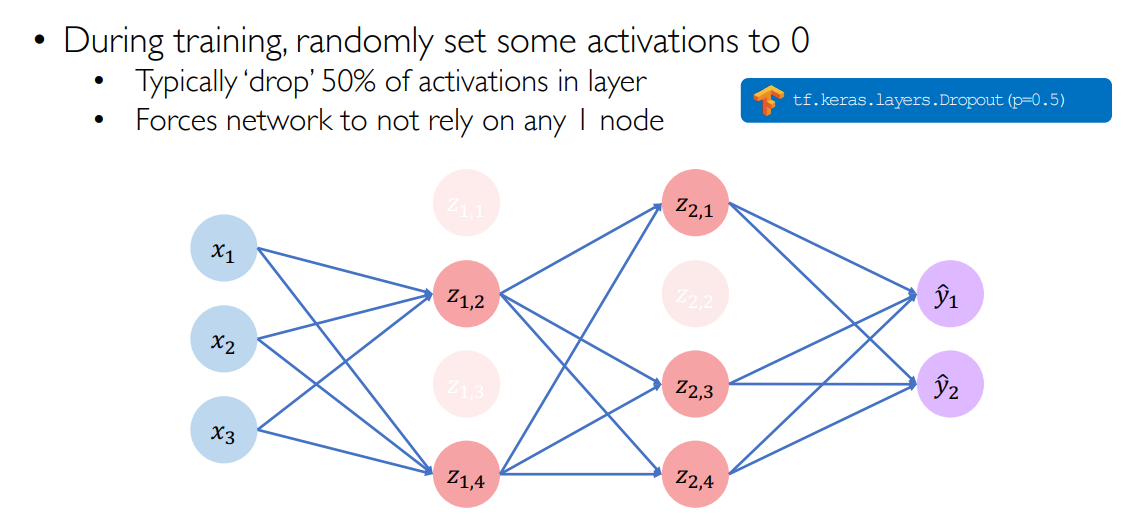

This can be used in TensorFlow adding a `Dropout` layer, with `p` specifying the probability (between 0 and 1) of a unit to be set to 0:
```Python
tf.keras.layers.Dropout(p=0.5)
```

#### Data Augmentation

n some cases, if your model overfits or does not work properly, this is just because you don't have enough samples in your training set! Indeed, Deep Learning models need a lot of data to work properly.

Thus sometimes you can then use data augmentation, which is the **artificial augmentation of your training dataset**. One of the most common example of data augmentation is in Computer Vision. You can modify an image to increase your training size with the following operations:
* Mirroring
* Croping
* Rotating
* Zooming
* ...

Below is an example of original cat picture (on left) and six artificially created images from the original. That way, you have artificially 7 times more data!

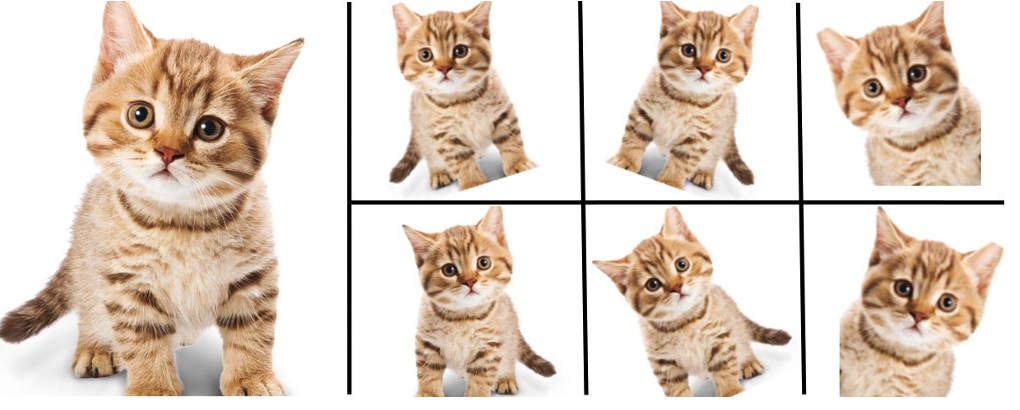

To do such thing, TensorFlow has a really powerful built-in function with the following signature:
`tf.keras.preprocessing.image.ImageDataGenerator`

You can find more on its usage [here](https://keras.io/preprocessing/image/).

### TensorBoard

TensorBoard is a tool that allows to visualize the learning process of our neural networks. It may come handy when trying to understand how a neural network is performing.

To use it, it has to be added to the callbacks (like Early Stopping), with the following callback:
```Python
keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')
```

The most important parameter to give is the `log_dir` where will be stored the information. Then one can visualize them using the command `tensorboard --logdir=Graph` where `Graph` is the given `log_dir` path.

We will now apply regularization techniques on the toy dataset we used previously: the boston dataset. As you probably noticed, MLP on this dataset can be highly accurate on train dataset, but overfit easily. Let's try to add regularization.

In [1]:
# Import and load the dataset
from sklearn.datasets import load_boston

data = load_boston().data
target = load_boston().target
features = load_boston().feature_names

# Have a peek on the data
import pandas as pd

X_df = pd.DataFrame(data=data, columns=features)
X_df.head()

# Let's scale and split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_df = scaler.fit_transform(X_df)
X_train, X_test, y_train, y_test = train_test_split(X_df, target, test_size=0.2, random_state=0)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers


# Create the function model
def model_five_layers(input_dim, regul=0, dropout=0):

    model = Sequential()

    # Add the first Dense layers of 100 units with the input dimension
    model.add(Dense(100, input_dim=input_dim, activation='relu', kernel_regularizer=regularizers.l2(regul)))

    # Add more layers of 100 units with regularization and then dropout
    model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(regul)))
    model.add(Dropout(dropout))
    model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(regul)))
    model.add(Dropout(dropout))
    model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(regul)))
    model.add(Dropout(dropout))
    model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(regul)))
    model.add(Dropout(dropout))
    
    # Add finally the output layer with one unit: the predicted result
    model.add(Dense(1, activation='linear', kernel_regularizer=regularizers.l2(regul)))
    
    return model

In [3]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard

# Define the model with regularization
model = model_five_layers(input_dim=X_train.shape[1], regul=0.0, dropout=0.1)
model.compile(optimizer='adam', loss='mean_squared_error')

# Define now our callbacks
callbacks = [EarlyStopping(monitor='val_loss', patience=30),
             TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)]

# Finally fit the model
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=500, batch_size=32, callbacks=callbacks)

Epoch 1/500
13/13 [==============================] - 2s 54ms/step - loss: 525.5070 - val_loss: 413.8069
Epoch 2/500
13/13 [==============================] - 0s 7ms/step - loss: 310.0317 - val_loss: 118.1972
Epoch 3/500
13/13 [==============================] - 0s 6ms/step - loss: 92.7305 - val_loss: 70.7450
Epoch 4/500
13/13 [==============================] - 0s 19ms/step - loss: 41.2179 - val_loss: 47.6623
Epoch 5/500
13/13 [==============================] - 0s 7ms/step - loss: 30.5920 - val_loss: 43.1675
Epoch 6/500
13/13 [==============================] - 0s 7ms/step - loss: 26.4950 - val_loss: 36.3100
Epoch 7/500
13/13 [==============================] - 0s 6ms/step - loss: 23.3707 - val_loss: 34.4278
Epoch 8/500
13/13 [==============================] - 0s 6ms/step - loss: 24.7726 - val_loss: 36.2083
Epoch 9/500
13/13 [==============================] - 0s 7ms/step - loss: 20.3941 - val_loss: 32.3481
Epoch 10/500
13/13 [==============================] - 0s 7ms/step - loss: 16.3300 - v

As you can see, early stopping worked, it stopped before arriving to the total number of epochs.

What about regularization and/or dropout? Feel free to try several values of regularization and see the impact.

Tensorboard is a really fancy plugin that helps you visualize what your neural network has done. This is again called as a Keras callback. En example will say more than a thousand words. We will reuse our toy example of yesterday, but with all we learnt today.

Then to use Tensorboard, just go back to your terminal and type
`tensorboard --logdir=Graph` where `Graph` is the path you defined in the tensorboard callback. You will see something like this:

In [4]:
!tensorboard --logdir=Graph

2021-01-23 09:08:34.973724: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.4.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


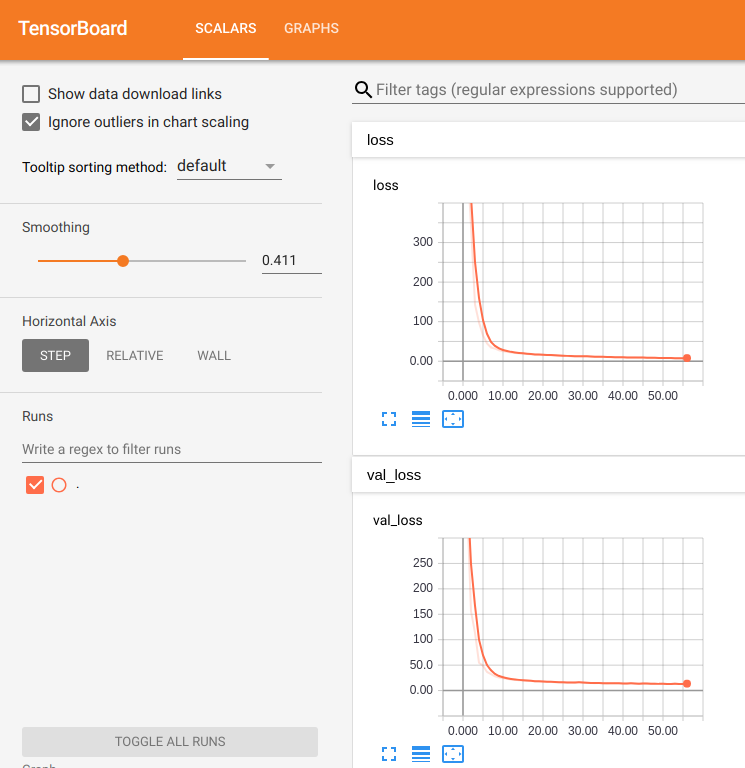

### Final Project

In [ ]:
# Importation de TensorFlow et de TensorFlow Datasets
import tensorflow as tf
import tensorflow_datasets as tfds

# les autres librairies utilitaires dont on ne peut pas se passer pour faire fonctionner notre code
import math
import matplotlib.pyplot as plt

# On teste pour voir si TensorFlow s'est bien installée
print(tf.__version__)  

2.4.0


In [ ]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteJJ0X05/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteJJ0X05/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
class_names = ['T-shirt', 'Pantalon', 'Pull', 'Robe', 'Manteau', 'Sandale', 'Chemise', 'Basket', 'Sac', 'Bottine']

In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

print(f"Nombre d'observations pour l'apprentissage: {num_train_examples}")
print(f"Nombre d'observations pour l'evaluation du model: {num_test_examples}")

Nombre d'observations pour l'apprentissage: 60000
Nombre d'observations pour l'evaluation du model: 10000


In [ ]:
my_image = next(iter(train_dataset))[0].numpy()

In [ ]:
def normalize(images, labels):
  """
  Cette fonction sera appliquee sur chaque image
  """
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels


train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

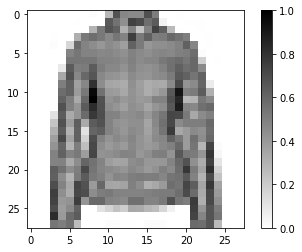

In [ ]:
# On va prendre une image et enlever la derniere dimesion qui represente la couleure(toute facon on a qu'un seul element)
image = next(iter(test_dataset.take(1)))[0].numpy().reshape((28,28))

# Affichons l'image - La mode dans toute sa splendeur
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

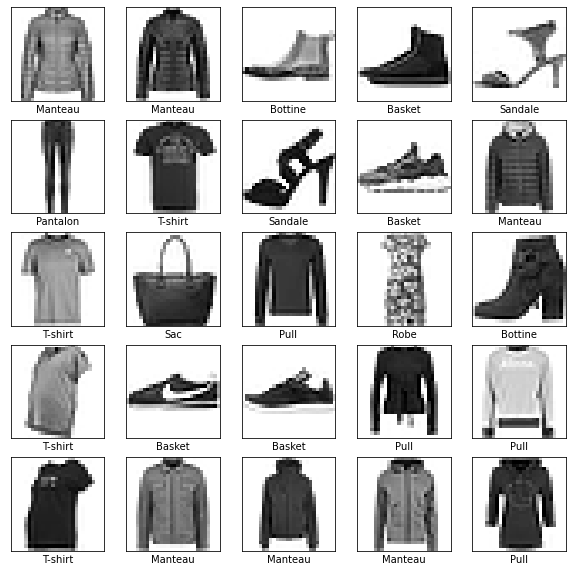

In [ ]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [ ]:
input_layer = tf.keras.layers.Flatten(input_shape=(28, 28, 1))
hidden_layer = tf.keras.layers.Dense(128, activation=tf.nn.relu)
droput_layer = tf.keras.layers.Dropout(0.2)
output_layer = tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
layers = [input_layer, hidden_layer,droput_layer, output_layer]
model = tf.keras.Sequential(layers)

In [ ]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
history = model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 12s 3ms/step - loss: 0.6767 - accuracy: 0.7636
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4049 - accuracy: 0.8529
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3725 - accuracy: 0.8641
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3423 - accuracy: 0.8735
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3364 - accuracy: 0.8768


{'accuracy': [0.8126000165939331,
  0.8557666540145874,
  0.8660666942596436,
  0.8741833567619324,
  0.8779000043869019],
 'loss': [0.5309953093528748,
  0.3970888555049896,
  0.3664347231388092,
  0.34273242950439453,
  0.33216995000839233]}

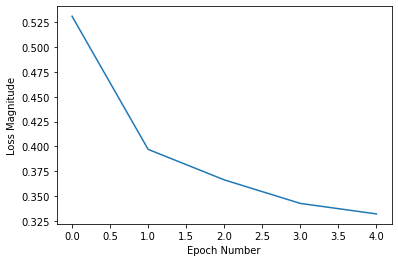

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])
history.history

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print("l'exactitude sur le jeu de test :", test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.3561 - accuracy: 0.8705
l'exactitude sur le jeu de test : 0.8705000281333923


In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [ ]:
predictions.shape

(32, 10)

In [ ]:
predictions[0]

array([3.8198837e-06, 1.5493082e-06, 1.5305890e-02, 1.7540031e-06,
       9.5697224e-01, 2.2048919e-08, 2.7711924e-02, 1.3569275e-10,
       2.8589043e-06, 3.8110324e-09], dtype=float32)

In [ ]:
import numpy as np
np.argmax(predictions[0])

4

In [ ]:
test_labels[0]

4

In [ ]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

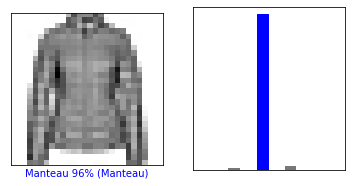

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

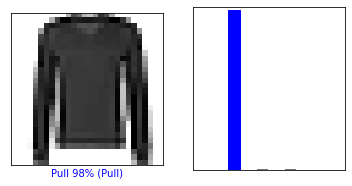

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

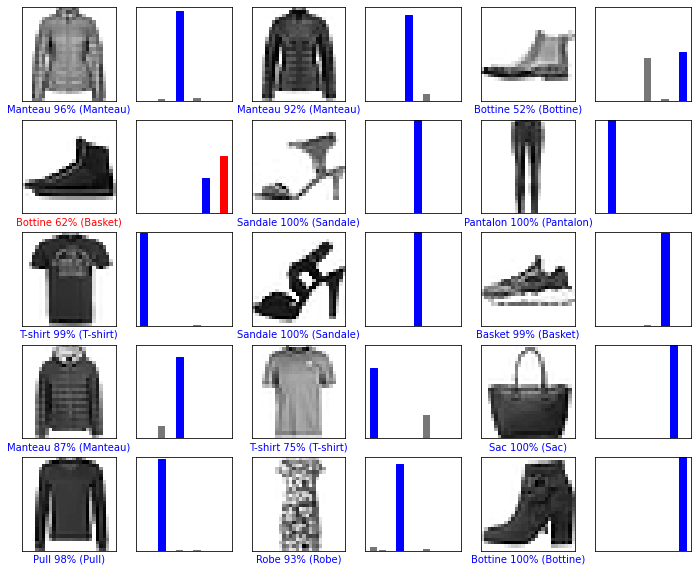

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

---
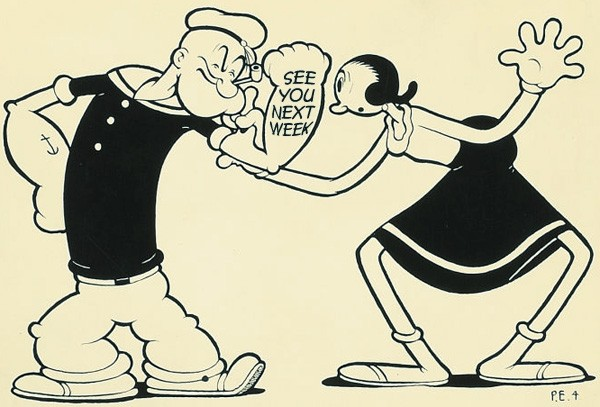